In [1]:
# Import libraries

# Pandas for data handling
import pandas # https://pandas.pydata.org/
# from pandas.plotting import scatter_matrix

# pretty tables
from IPython.display import display

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib+Seaborn for visualization
import matplotlib.pyplot as pl  # https://matplotlib.org/
import seaborn as sns

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# data preprocessing / feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# combining
from sklearn.pipeline import make_pipeline

#########

In [2]:
# QUESTION 1 - Loading Data
print('Loading data from file ...')  
dataset = pandas.read_csv('winequality-white.csv')
print('done \n')

print('Removing rows with missing data ...')
dataset = dataset.dropna() 
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [3]:
#Question 1_contd - Previewing Data
print('Sample rows from the dataset (top and bottom five):')  # Spot checks
display(dataset.head(5))
display(dataset.tail(5))
print('\n')

Sample rows from the dataset (top and bottom five):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [4]:
#Question 1_cont'd - Presenting Data Summary
#Tabular representations
print('Summary of the dataset - Univariate statistics')   
display(dataset.describe(include='all'))
print('\n')

Summary of the dataset - Univariate statistics


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
#Graphical summaries will be done for spot checks of X and y (i.e, interested quantities for our Model development)
#As such, we will set the X(features) and y(target) 
#In this case, the features: 
#(fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, density, pH, sulphates,and alcohol) 
#will be used to predict FlowPattern
print('Reading list of problem variables X and Y...')
X_name = [ 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features
y_name = 'quality'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



Sample rows from X (top and bottom):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8




Statistical summary of X:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000




Summary of X - Univariate graphs

Histograms:


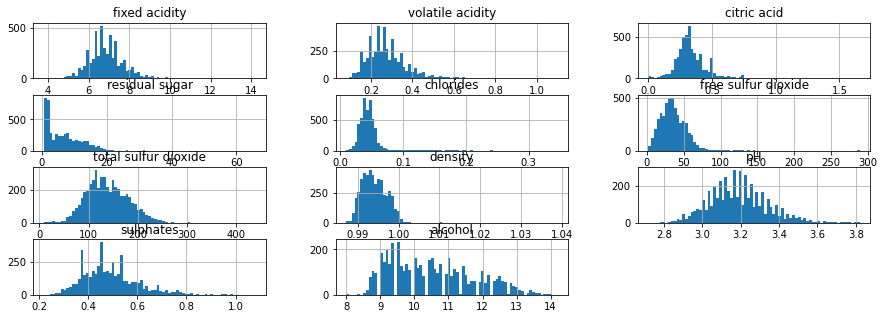

Box plots:


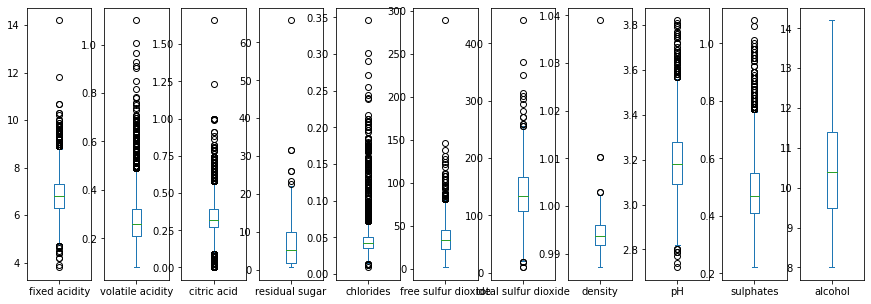

Summary of X - Bivariate (column-pair) graphs:

Correlation matrix:


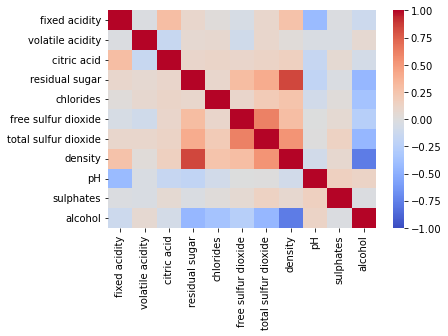

In [6]:
#Question 1_cont'd - Tabular and Graphical summary (spot checks for X)

print('Sample rows from X (top and bottom):')
display(X.head(5))
display(X.tail(5))
print('\n')

print('Statistical summary of X:')
display(X.describe())
print('\n')

print('Summary of X - Univariate graphs\n')

print('Histograms:')
X.hist(figsize=(15, 5), bins=75)  # bins ~= sqrt(N)
pl.show()

print('Box plots:')
X.plot(figsize=(15, 5), kind='box', subplots=True, sharex=False, sharey=False)
pl.show()

print('Summary of X - Bivariate (column-pair) graphs:\n')
print('Correlation matrix:')
corr = X.corr()
sns.heatmap( corr, cmap='coolwarm', vmax=1.0, vmin=-1.0 );
pl.show()

In [7]:
#tabular_representation_for_y
print('Summary of y:')
display(y.value_counts())
print()
print('Sample rows from Y (top and bottom):')
display(y.head(5))
print()
display(y.tail(5))
print('\n')

Summary of y:


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


Sample rows from Y (top and bottom):


0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, dtype: int64

Summary of y - Univariate graph

Histogram:


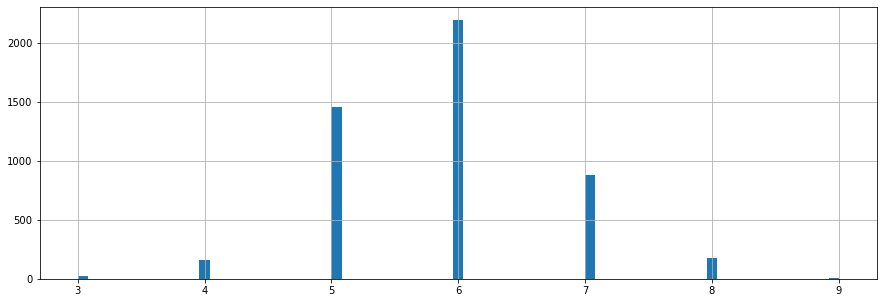

In [8]:
#graphical_representation_for_y
print('Summary of y - Univariate graph\n')

print('Histogram:')
y.hist(figsize=(15, 5), bins=75)  
pl.show()

In [9]:
# Question 1 Cont'd - Setting up a classification problem

# Split data into training and testing datasets

print('Partitioning data into parts: formative (for development) and summative (for testing) ...')
test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 42          # specifying the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)
print('done with setting aside data for testing')

Partitioning data into parts: formative (for development) and summative (for testing) ...
done with setting aside data for testing


In [10]:
# Question 2

# Chose the formative scoring method

print('Reading list of scoring methods to use during model development ...')
scoring = 'accuracy'
print('done \n')

Reading list of scoring methods to use during model development ...
done 



In [11]:
# Chose the Algorithms

seed = 42 # setting the seed allows for repeatability

print('Reading list of algorithms to train ...')
models = []
models.append(( 'raw_SVM', SVC(random_state=seed) ))
#models.append(( 'scaled_SVM', make_pipeline( MinMaxScaler(), SVC(random_state=seed) )  ))
#models.append(( 'raw_kNN', KNeighborsClassifier() ))
#models.append(( 'scaled_kNN', make_pipeline( MinMaxScaler(), KNeighborsClassifier() )  ))
models.append(( 'raw_DT', DecisionTreeClassifier(random_state=seed) ))
#models.append(( 'scaled_DT', make_pipeline( MinMaxScaler(), DecisionTreeClassifier(random_state=seed) )  ))
print('done \n')

Reading list of algorithms to train ...
done 



In [12]:
# Training the model via cross validation

k4folds = 5
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split ...")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, verbose=3)
    results.append(cv_results)
    print()
    print("5-fold cross validation results:", results)
    print()
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)
    print()
    print("Training commenced for the next algorithm...\n")
    
print('all model trainings have been completed \n')

 ++ NOW WORKING ON ALGORITHM raw_SVM ++
Splitting data into 5 folds
Training model on each split ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.450) total time=   1.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] END ................................ score: (test=0.427) total time=   1.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] END ................................ score: (test=0.481) total time=   1.1s
[CV] END ................................ score: (test=0.448) total time=   1.1s
[CV] END ................................ score: (test=0.450) total time=   1.1s

5-fold cross validation results: [array([0.4502551 , 0.42729592, 0.48086735, 0.44827586, 0.449553  ])]

algorithm raw_SVM accuracy results: mean = 0.451249 (std = 0.017110)

Training commenced for the next algorithm...

 ++ NOW WORKING ON ALGORITHM raw_DT ++
Splitting data into 5 folds
Training model on each split ...
[CV] END ................................ score: (test=0.573) total time=   0.0s
[CV] END ................................ score: (test=0.561) total time=   0.0s
[CV] END ................................ score: (test=0.543) total time=   0.0s
[CV] END ................................ score: (test=0.559) total time=   0.0s
[CV] END ................................ score: (test=0.554) total time=   0.0s

5-fold cross validation result

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


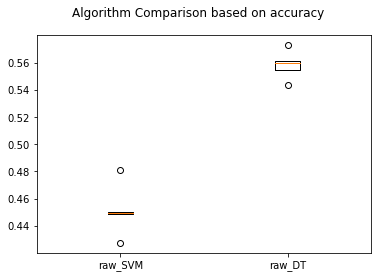

In [13]:
# Compare Algorithms
fig = pl.figure()
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
pl.boxplot(results)
ax.set_xticklabels(names)
pl.show()

##### From the default use of support vector machine and decision trees, the output shows that DT is more accurate than SVM. 
##### This is the result obtained before model modification / tuning 

In [14]:
# Question 3 - Modifying models' hyper-parameters

# Tuning Decision Tree Classifier hyperparameters using GridSearch

selected_model = DecisionTreeClassifier()
hyperparameters = {'max_depth':[4, 5, 6, 7], 'criterion':['gini', 'entropy'] }

print("Now tuning hyperparameters...")
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring=scoring, verbose=4)
clf.fit(X_train, y_train)

print("Best hyperparameters found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print('done \n')

DT_tuned_model = clf.best_estimator_

Now tuning hyperparameters...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.528 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.529 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.552 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.525 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.516 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.528 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.536 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.550 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.534 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.526 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.537 total time=   0.0s
[CV 2/5] END ......

##### From the above, DT using entropy criteria and max_depth of 7 returns as the best model

In [15]:
# Question 3 Cont'd - Modifying models' hyper-parameters
# Tuning Decision Tree Classifier hyperparameters using GridSearch
#clf = SVC(kernel='rbf', gamma=0.1)
selected_model = SVC()
hyperparameters = {'kernel':['linear', 'rbf'], 'C':[0.01, 1] }

print("Now tuning hyperparameters...")
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring=scoring, verbose=4)
clf.fit(X_train, y_train)
print("Best hyperparameters found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print('done \n')
SVC_tuned_model = clf.best_estimator_

Now tuning hyperparameters...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.511 total time=   4.8s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.497 total time=   5.5s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.515 total time=   6.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.494 total time=   7.1s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.484 total time=   7.1s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.452 total time=   1.0s
[CV 2/5] END ................C=0.01, kernel=rbf;, score=0.450 total time=   1.0s
[CV 3/5] END ................C=0.01, kernel=rbf;, score=0.450 total time=   1.0s
[CV 4/5] END ................C=0.01, kernel=rbf;, score=0.451 total time=   1.0s
[CV 5/5] END ................C=0.01, kernel=rbf;, score=0.451 total time=   1.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.534 total time= 2.4min
[CV 2/5] END ......

##### From the above, the best SVC model is that of C:1 and linear kernel. 

In [20]:
# Question 4
# Implementing the make_pipeline method 
# Note that the best model obtained from step 3 are applied here
seed = 42 # setting the seed allows for repeatability
print('Reading list of algorithms to train using scaled data...')
models = []
models.append(( 'scaled_SVM_MinMax', make_pipeline( MinMaxScaler(), SVC(kernel='linear', C=1) )  ))
models.append(( 'scaled_DT_MinMax', make_pipeline( MinMaxScaler(), DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=seed) )  ))
models.append(( 'scaled_SVM_StandardScalar', make_pipeline( StandardScaler(), SVC(kernel='linear', C=1) )  ))
models.append(( 'scaled_DT_StandardScalar', make_pipeline( StandardScaler(), DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=seed) )  ))
print('done \n')

Reading list of algorithms to train using scaled data...
done 



In [21]:
# Training the implemented make_pipeline (scaled) model via cross validation

k4folds = 5
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split ...")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, verbose=3)
    results.append(cv_results)
    print()
    print("5-fold cross validation results:", results)
    print()
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)
    print()
    print("Training commenced for the next algorithm...\n")
    
print('all model trainings have been completed \n')

 ++ NOW WORKING ON ALGORITHM scaled_SVM_MinMax ++
Splitting data into 5 folds
Training model on each split ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.522) total time=   0.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] END ................................ score: (test=0.527) total time=   0.6s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] END ................................ score: (test=0.541) total time=   0.6s
[CV] END ................................ score: (test=0.524) total time=   0.6s
[CV] END ................................ score: (test=0.506) total time=   0.6s

5-fold cross validation results: [array([0.52168367, 0.52678571, 0.54081633, 0.52362708, 0.50574713])]

algorithm scaled_SVM_MinMax accuracy results: mean = 0.523732 (std = 0.011215)

Training commenced for the next algorithm...

 ++ NOW WORKING ON ALGORITHM scaled_DT_MinMax ++
Splitting data into 5 folds
Training model on each split ...
[CV] END ................................ score: (test=0.579) total time=   0.0s
[CV] END ................................ score: (test=0.543) total time=   0.0s
[CV] END ................................ score: (test=0.529) total time=   0.0s
[CV] END ................................ score: (test=0.540) total time=   0.0s
[CV] END ................................ score: (test=0.535) total time=   0.0s

5-fold cro

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.531) total time=   0.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] END ................................ score: (test=0.534) total time=   0.9s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] END ................................ score: (test=0.543) total time=   0.9s
[CV] END ................................ score: (test=0.521) total time=   0.9s
[CV] END ................................ score: (test=0.508) total time=   0.9s

5-fold cross validation results: [array([0.52168367, 0.52678571, 0.54081633, 0.52362708, 0.50574713]), array([0.57908163, 0.54336735, 0.52933673, 0.54022989, 0.53512133]), array([0.53061224, 0.53443878, 0.54336735, 0.5210728 , 0.5083014 ])]

algorithm scaled_SVM_StandardScalar accuracy results: mean = 0.527559 (std = 0.011996)

Training commenced for the next algorithm...

 ++ NOW WORKING ON ALGORITHM scaled_DT_StandardScalar ++
Splitting data into 5 folds
Training model on each split ...
[CV] END ................................ score: (test=0.579) total time=   0.0s
[CV] END ................................ score: (test=0.543) total time=   0.0s
[CV] END ................................ score: (test=0.529) total time=   0.0s
[CV] END ..........

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


#### When Scaled DT is compared with the raw DT, the accuracy mean increased from 55.8% to 54.5%. As such, a reduced accuracy was obtained. 
#### The justification for such result is that Decision Tree does not depend on distance which makes the scaling redudant for its improved performance

#### When Scaled SVC is compared to the raw DT, the accuracy increased from 45.025% to 52.373% revealing the improved performance effects of the scaling on SVC.

#### PS: Both MinMax and StandardScalar were explored for the makepipeline() and MinMax returns higher accuracy. This is because the datasets are not all normally distributed. 

 ++++ Detailed classification report for the selected model ++++ 
Algorithm: Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(C=1, kernel='linear'))]) 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


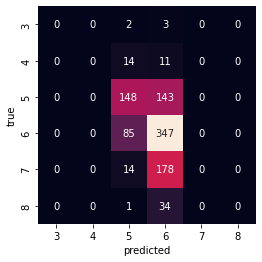


 clasification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.56      0.51      0.53       291
           6       0.48      0.80      0.60       432
           7       0.00      0.00      0.00       192
           8       0.00      0.00      0.00        35

    accuracy                           0.51       980
   macro avg       0.17      0.22      0.19       980
weighted avg       0.38      0.51      0.42       980

Cohen Kappa Score: 0.17233188916595854


done 



/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [22]:
selected_model = make_pipeline( MinMaxScaler(),SVC(kernel='linear', C=1) ) 
selected_model.fit(X_train, y_train)
predictions = selected_model.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ " )
print("Algorithm: %s " % selected_model)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
#
predictions = selected_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pandas.DataFrame(cm, columns=numpy.unique(y_test), index = numpy.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
pl.xlabel('predicted')
pl.ylabel('true')
pl.show()
#
print('\n clasification report:\n', classification_report(y_test, predictions))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, predictions))
print('\n')        
print('done \n')

 ++++ Detailed classification report for the selected model ++++ 
Algorithm: Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('dummyclassifier', DummyClassifier())]) 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


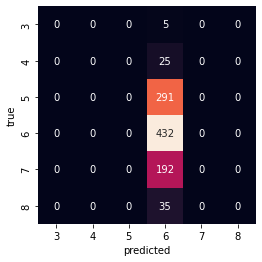


 clasification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00       291
           6       0.44      1.00      0.61       432
           7       0.00      0.00      0.00       192
           8       0.00      0.00      0.00        35

    accuracy                           0.44       980
   macro avg       0.07      0.17      0.10       980
weighted avg       0.19      0.44      0.27       980

Cohen Kappa Score: 0.0


done 



/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [19]:
from sklearn.dummy import DummyClassifier
selected_model = make_pipeline( MinMaxScaler(),DummyClassifier()) 
selected_model.fit(X_train, y_train)
predictions = selected_model.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ " )
print("Algorithm: %s " % selected_model)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
#
predictions = selected_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pandas.DataFrame(cm, columns=numpy.unique(y_test), index = numpy.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
pl.xlabel('predicted')
pl.ylabel('true')
pl.show()
#
print('\n clasification report:\n', classification_report(y_test, predictions))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, predictions))
print('\n')        
print('done \n')

#### From inspection, the trained model perform better than the randomly-based dummy trained model. However, the difference of 6% shows that the adopted model still needs to be trained more efficiently.